In [17]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import messagebox

In [18]:
# Define ranges
voltage_range = np.arange(0, 13, 0.1)
current_range = np.arange(0, 101, 1)
temperature_range = np.arange(0, 101, 1)


# Define fuzzy variables
voltage = ctrl.Antecedent(np.arange(0, 13, 1), 'voltage')
current = ctrl.Antecedent(np.arange(0, 101, 1), 'current')
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')
health = ctrl.Consequent(np.arange(0, 101, 1), 'health')

# Define membership functions for voltage
voltage['low'] = fuzz.trapmf(voltage.universe, [0, 0, 4, 6])
voltage['medium'] = fuzz.trimf(voltage.universe, [4, 6, 8])
voltage['high'] = fuzz.trapmf(voltage.universe, [6, 8, 12, 12])

# Define membership functions for current
current['low'] = fuzz.trapmf(current.universe, [0, 0, 20, 50])
current['medium'] = fuzz.trimf(current.universe, [30, 50, 70])
current['high'] = fuzz.trapmf(current.universe, [50, 80, 100, 100])

# Define membership functions for temperature
temperature['low'] = fuzz.trapmf(temperature.universe, [0, 0, 10, 40])
temperature['medium'] = fuzz.trimf(temperature.universe, [30, 50, 70])
temperature['high'] = fuzz.trapmf(temperature.universe, [60, 90, 100, 100])

# Define membership functions for health
health['bad'] = fuzz.trapmf(health.universe, [0, 0, 25, 50])
health['average'] = fuzz.trimf(health.universe, [25, 50, 75])
health['good'] = fuzz.trapmf(health.universe, [50, 75, 100, 100])



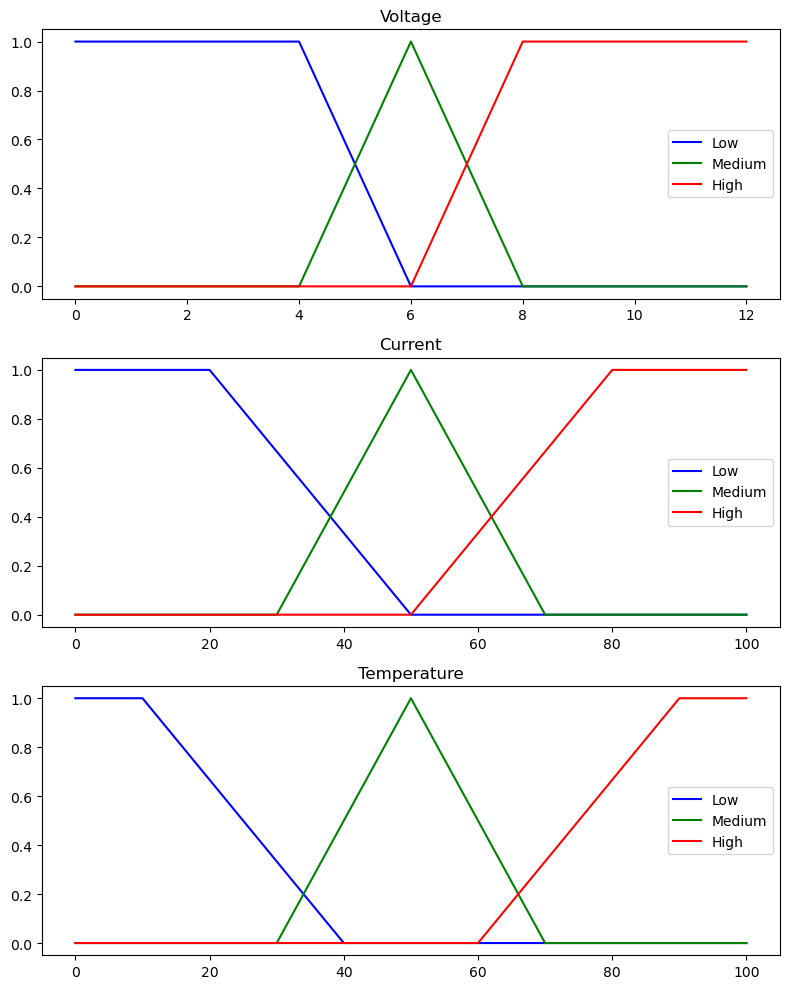

In [19]:
# Plot membership functions
fig, axes = plt.subplots(nrows=3, figsize=(8, 10))

axes[0].plot(voltage.universe, voltage['low'].mf, 'b', linewidth=1.5, label='Low')
axes[0].plot(voltage.universe, voltage['medium'].mf, 'g', linewidth=1.5, label='Medium')
axes[0].plot(voltage.universe, voltage['high'].mf, 'r', linewidth=1.5, label='High')
axes[0].set_title('Voltage')
axes[0].legend()

axes[1].plot(current.universe, current['low'].mf, 'b', linewidth=1.5, label='Low')
axes[1].plot(current.universe, current['medium'].mf, 'g', linewidth=1.5, label='Medium')
axes[1].plot(current.universe, current['high'].mf, 'r', linewidth=1.5, label='High')
axes[1].set_title('Current')
axes[1].legend()

axes[2].plot(temperature.universe, temperature['low'].mf, 'b', linewidth=1.5, label='Low')
axes[2].plot(temperature.universe, temperature['medium'].mf, 'g', linewidth=1.5, label='Medium')
axes[2].plot(temperature.universe, temperature['high'].mf, 'r', linewidth=1.5, label='High')
axes[2].set_title('Temperature')
axes[2].legend()

plt.tight_layout()
plt.show()

In [20]:

# تحديد القواعد
rules = [
    ctrl.Rule(voltage['low'] & current['low'] & temperature['low'], health['good']),
    ctrl.Rule(voltage['low'] & current['low'] & temperature['medium'], health['good']),
    ctrl.Rule(voltage['low'] & current['low'] & temperature['high'], health['average']),
    ctrl.Rule(voltage['low'] & current['medium'] & temperature['low'], health['good']),
    ctrl.Rule(voltage['low'] & current['medium'] & temperature['medium'], health['average']),
    ctrl.Rule(voltage['low'] & current['medium'] & temperature['high'], health['average']),
    ctrl.Rule(voltage['low'] & current['high'] & temperature['low'], health['average']),
    ctrl.Rule(voltage['low'] & current['high'] & temperature['medium'], health['average']),
    ctrl.Rule(voltage['low'] & current['high'] & temperature['high'], health['bad']),
    ctrl.Rule(voltage['medium'] & current['low'] & temperature['low'], health['good']),
    ctrl.Rule(voltage['medium'] & current['low'] & temperature['medium'], health['good']),
    ctrl.Rule(voltage['medium'] & current['low'] & temperature['high'], health['average']),
    ctrl.Rule(voltage['medium'] & current['medium'] & temperature['low'], health['average']),
    ctrl.Rule(voltage['medium'] & current['medium'] & temperature['medium'], health['average']),
    ctrl.Rule(voltage['medium'] & current['medium'] & temperature['high'], health['bad']),
    ctrl.Rule(voltage['medium'] & current['high'] & temperature['low'], health['average']),
    ctrl.Rule(voltage['medium'] & current['high'] & temperature['medium'], health['bad']),
    ctrl.Rule(voltage['medium'] & current['high'] & temperature['high'], health['bad']),
    ctrl.Rule(voltage['high'] & current['low'] & temperature['low'], health['average']),
    ctrl.Rule(voltage['high'] & current['low'] & temperature['medium'], health['average']),
    ctrl.Rule(voltage['high'] & current['low'] & temperature['high'], health['bad']),
    ctrl.Rule(voltage['high'] & current['medium'] & temperature['low'], health['bad']),
    ctrl.Rule(voltage['high'] & current['medium'] & temperature['medium'], health['bad']),
    ctrl.Rule(voltage['high'] & current['medium'] & temperature['high'], health['bad']),
    ctrl.Rule(voltage['high'] & current['high'] & temperature['low'], health['bad']),
    ctrl.Rule(voltage['high'] & current['high'] & temperature['medium'], health['bad']),
    ctrl.Rule(voltage['high'] & current['high'] & temperature['high'], health['bad']),
]

# إنشاء نظام التحكم الضبابي
health_ctrl = ctrl.ControlSystem(rules)
health_sim = ctrl.ControlSystemSimulation(health_ctrl)

In [21]:
# Set inputs
health_sim.input['voltage'] = 6.5
health_sim.input['current'] = 40
health_sim.input['temperature'] = 25

# Compute output
health_sim.compute()

# Output result
print(f"Health: {health_sim.output['health']}")


Health: 52.56505686707028


Defuzzified Health: 52.56505686707028


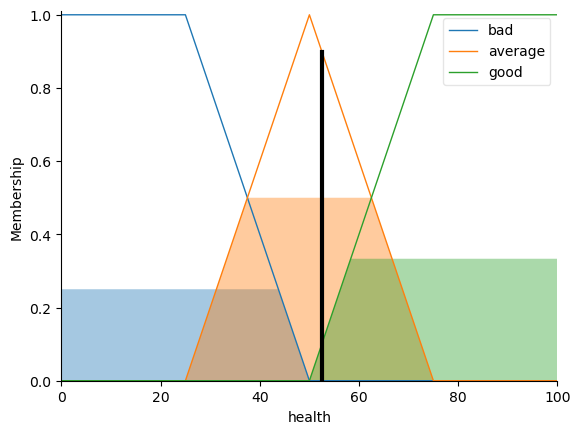

In [22]:
# Get the defuzzified result
health_output = health_sim.output['health']
print(f"Defuzzified Health: {health_output}")

# Plotting the result
health.view(sim=health_sim)
plt.show()


In [23]:
def diagnose_battery():
    voltage_input = float(voltage_entry.get())
    current_input = float(current_entry.get())
    temperature_input = float(temperature_entry.get())
    
    health_sim.input['voltage'] = voltage_input
    health_sim.input['current'] = current_input
    health_sim.input['temperature'] = temperature_input

    health_sim.compute()
    
    health_output = health_sim.output['health']
    messagebox.showinfo("Battery Health", f"Battery Health: {health_output:.2f}")

# Create the main window
root = tk.Tk()
root.title("Battery Health Diagnosis System")

# Create and place the input fields and labels
tk.Label(root, text="Voltage (V)").grid(row=0, column=0, padx=10, pady=10)
voltage_entry = tk.Entry(root)
voltage_entry.grid(row=0, column=1, padx=10, pady=10)

tk.Label(root, text="Current (A)").grid(row=1, column=0, padx=10, pady=10)
current_entry = tk.Entry(root)
current_entry.grid(row=1, column=1, padx=10, pady=10)

tk.Label(root, text="Temperature (°C)").grid(row=2, column=0, padx=10, pady=10)
temperature_entry = tk.Entry(root)
temperature_entry.grid(row=2, column=1, padx=10, pady=10)

# Create and place the diagnose button
diagnose_button = tk.Button(root, text="Diagnose", command=diagnose_battery)
diagnose_button.grid(row=3, column=0, columnspan=2, padx=10, pady=10)

# Run the main loop
root.mainloop()

In [24]:
# Test data
test_data = [
    {'voltage': 6, 'current': 30, 'temperature': 20, 'expected_health': 60},
    {'voltage': 10, 'current': 70, 'temperature': 80, 'expected_health': 30},
    {'voltage': 6, 'current': 15, 'temperature': 25, 'expected_health': 50},
]

# Testing methodology
for data in test_data:
    health_sim.input['voltage'] = data['voltage']
    health_sim.input['current'] = data['current']
    health_sim.input['temperature'] = data['temperature']
    health_sim.compute()
    health_output = health_sim.output['health']
    print(f"Expected: {data['expected_health']}, Predicted: {health_output}")

Expected: 60, Predicted: 78.88888888888884
Expected: 30, Predicted: 21.111111111111097
Expected: 50, Predicted: 77.97619047619047
